In [1]:
# Fix randomness and hide warnings
seed = 42

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["PYTHONHASHSEED"] = str(seed)
os.environ["MPLCONFIGDIR"] = os.getcwd() + "/configs/"

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)

import numpy as np

np.random.seed(seed)

import logging

import random

random.seed(seed)

In [2]:
!pip install tensorflow==2.14.0

  Obtaining dependency information for tensorflow==2.14.0 from https://files.pythonhosted.org/packages/e2/7a/c7762c698fb1ac41a7e3afee51dc72aa3ec74ae8d2f57ce19a9cded3a4af/tensorflow-2.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for ml-dtypes==0.2.0 from https://files.pythonhosted.org/packages/d1/1d/d5cf76e5e40f69dbd273036e3172ae4a614577cb141673427b80cac948df/ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Obtaining dependency information for tensorboard<2.15,>=2.14 from https://files.pythonhosted.org/packages/73/a2/66ed644f6ed1562e0285fcd959af17670ea313c8f331c46f79ee77187eb9/tensorboard-2.14.1-py3-none-any.whl.metadata
  Obtaining dependency information for tensorflow-estimator<2.15,>=2.14.0 from https://files.pythonhosted.org/packages/d1/da/4f264c196325bb6e37a6285caec5b12a03def489b57cc1fdac02bb627

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [4]:
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

plt.rc("font", size=16)

# Process data

In [5]:
categories = np.load("/kaggle/input/ann2challenge/categories.npy")
data = np.load("/kaggle/input/ann2challenge/training_data.npy")
valid_periods = np.load("/kaggle/input/ann2challenge/valid_periods.npy")

In [6]:
count_A=0
count_B=0
count_C=0
count_D=0
count_E=0
count_F=0

for i in range(data.shape[0]):
  if categories[i]=='A':
    count_A+=1
  if categories[i]=='B':
    count_B+=1
  if categories[i]=='C':
    count_C+=1
  if categories[i]=='D':
    count_D+=1
  if categories[i]=='E':
    count_E+=1
  if categories[i]=='F':
    count_F+=1

print(f"There are {count_A} occurences of category A")
print(f"There are {count_B} occurences of category B")
print(f"There are {count_C} occurences of category C")
print(f"There are {count_D} occurences of category D")
print(f"There are {count_E} occurences of category E")
print(f"There are {count_F} occurences of category F")

There are 5728 occurences of category A
There are 10987 occurences of category B
There are 10017 occurences of category C
There are 10016 occurences of category D
There are 10975 occurences of category E
There are 277 occurences of category F


In [7]:
generated_A=np.load("/kaggle/input/ann2gan/generated_samples_A_adjusted.npy")
generated_F=np.load("/kaggle/input/ann2gan/generated_samples_F_adjusted.npy")

In [8]:
print(generated_A.shape)
print(generated_F.shape)
print(data.shape)

(2000, 2776)
(200, 2776)
(48000, 2776)


In [9]:
# Create a structured array with a string field named 'category'
cat_gen_A = np.full((2000,), 'A', dtype='U1')
cat_gen_F = np.full((200,), 'F', dtype='U1')


# Print the shape and the first few elements for verification
print("Shape of cat_gen_A:", cat_gen_A.shape)
print("Shape of cat_gen_F:", cat_gen_F.shape)
print("Shape of categories:", categories.shape)
print("First element of cat_gen_A:\n", cat_gen_A[0])
print("First element of cat_gen_F:\n", cat_gen_F[0])
print("First element of categories:\n", categories[0])
print(valid_periods.shape)

Shape of cat_gen_A: (2000,)
Shape of cat_gen_F: (200,)
Shape of categories: (48000,)
First element of cat_gen_A:
 A
First element of cat_gen_F:
 F
First element of categories:
 D
(48000, 2)


In [10]:
# Find the index of the first nonzero element along the second axis
nonzero_indices_A = np.argmax(generated_A[:, 0:] != 0, axis=1) + 0

# Create the desired array with shape (2000, 2)
valid_per_gen_A = np.column_stack((nonzero_indices_A, np.full((2000,), 2776)))

# Print the result array
print("Result Array:")
print(valid_per_gen_A[:10])
print("\n",valid_periods[:10])
print(valid_per_gen_A.shape)

Result Array:
[[2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]
 [2459 2776]]

 [[2325 2776]
 [2325 2776]
 [2325 2776]
 [2712 2776]
 [2682 2776]
 [2128 2776]
 [2682 2776]
 [2682 2776]
 [1972 2776]
 [2428 2776]]
(2000, 2)


In [11]:
# Find the index of the first nonzero element along the second axis
nonzero_indices_F = np.argmax(generated_F[:, 0:] != 0, axis=1) + 0

# Create the desired array with shape (2000, 2)
valid_per_gen_F = np.column_stack((nonzero_indices_F, np.full((200,), 2776)))

# Print the result array
print("Result Array:")
print(valid_per_gen_F[:10])
print("\n",valid_periods[:10])
print(valid_per_gen_F.shape)

Result Array:
[[2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]
 [2402 2776]]

 [[2325 2776]
 [2325 2776]
 [2325 2776]
 [2712 2776]
 [2682 2776]
 [2128 2776]
 [2682 2776]
 [2682 2776]
 [1972 2776]
 [2428 2776]]
(200, 2)


In [12]:
valid_periods = np.concatenate((valid_periods, valid_per_gen_A), axis=0)
print(valid_periods.shape)
valid_periods = np.concatenate((valid_periods, valid_per_gen_F), axis=0)
print(valid_periods.shape)


(50000, 2)
(50200, 2)


In [13]:
categories = np.concatenate((categories, cat_gen_A), axis=0)
print(categories.shape)
categories = np.concatenate((categories, cat_gen_F), axis=0)
print(categories.shape)

(50000,)
(50200,)


In [14]:
data = np.concatenate((data, generated_A), axis=0)
print(data.shape)
data = np.concatenate((data, generated_F), axis=0)
print(data.shape)

(50000, 2776)
(50200, 2776)


In [15]:
# Generate shuffled indices
shuffled_indices = np.arange(len(data))
np.random.shuffle(shuffled_indices)

# Use shuffled indices to reorder data, valid_periods, and categories
data = data[shuffled_indices]
valid_periods = valid_periods[shuffled_indices]
categories = categories[shuffled_indices]

In [16]:
from random import randint
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categories array
encoded_categories = label_encoder.fit_transform(categories)

# Create an instance of OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)

# Reshape the encoded categories array to a column vector
encoded_categories = encoded_categories.reshape(-1, 1)

# One-hot encode the categories
onehot_categories = onehot_encoder.fit_transform(encoded_categories)

# Print the one-hot encoded categories
print(onehot_categories.shape)

(50200, 6)


In [17]:
(
    train_val_data,
    test_data,
    train_val_categories,
    test_categories,
    train_val_periods,
    test_periods,
) = train_test_split(
    data, onehot_categories, valid_periods, test_size=0.1, random_state=seed
)
(
    train_data,
    val_data,
    train_categories,
    val_categories,
    train_periods,
    val_periods,
) = train_test_split(
    train_val_data,
    train_val_categories,
    train_val_periods,
    test_size=0.1,
    random_state=seed,
)

print("Train data shape:", train_data.shape)


Train data shape: (40662, 2776)


In [18]:
def build_sequences(data, valid_periods, categories, window, stride=10, telescope=18):
    windows = []
    telescopes = []

    for i in range(data.shape[0]):
        full_seq = data[i, valid_periods[i, 0] : valid_periods[i, 1]]

        # Add padding if needed
        if full_seq.shape[0] < window + telescope:
            full_seq = np.concatenate(
                (
                    np.zeros(window + telescope - full_seq.shape[0], dtype="float32"),
                    full_seq,
                )
            )

        seq_index = 0
        while seq_index <= full_seq.shape[0] - window - telescope:
            seq = full_seq[seq_index : seq_index + window]
            seq = np.concatenate((seq, categories[i, :]), axis=0)
            windows.append(seq)
            telescopes.append(
                full_seq[seq_index + window : seq_index + window + telescope]
            )
            seq_index += stride

    windows = np.array(windows).reshape((len(windows), window + 6, 1))
    telescopes = np.array(telescopes).reshape((len(telescopes), telescope, 1))
    return windows, telescopes

In [19]:
WINDOW_SIZE = 100

train_windows, train_telescopes = build_sequences(
    train_data, train_periods, train_categories, WINDOW_SIZE
)
val_windows, val_telescopes = build_sequences(
    val_data, val_periods, val_categories, WINDOW_SIZE
)
test_windows, test_telescopes = build_sequences(
    test_data, test_periods, test_categories, WINDOW_SIZE
)

train_windows.shape, train_telescopes.shape, val_windows.shape, test_windows.shape

((452504, 106, 1), (452504, 18, 1), (50882, 106, 1), (55657, 106, 1))

# Train models

In [22]:
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, SpatialDropout1D, MaxPooling1D, Concatenate, Dense, Flatten, Reshape, Lambda, MultiHeadAttention
from tensorflow.keras.models import Model
import tensorflow.keras.layers as tfkl

BASE_MODEL_STEPS = int(6)

def build_base_model():
    # Define the input layer with the specified shape
    input_layer = tfkl.Input(shape=(None, 1), name="input_layer")

    # Split input into series and one-hot categories
    series_input = tfkl.Lambda(lambda x: x[:, :-6, :])(input_layer)

    x = tfkl.GaussianNoise(0.001)(series_input)

    # First residual block
    shortcut = x
    x = tfkl.Conv1D(64, 7, padding="causal", activation="relu", name="conv_1")(x)
    x = tfkl.Conv1D(64, 7, padding="causal", name="conv_2")(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Activation('relu')(x)
    x = tfkl.Add()([x, shortcut])

    x = tfkl.MaxPooling1D(name="pool_1")(x)
    x = tfkl.SpatialDropout1D(0.1)(x)

    # Second residual block
    shortcut = x
    x = tfkl.Conv1D(64, 7, padding="causal", name="conv_3")(x)
    x = tfkl.Conv1D(64, 7, padding="causal", name="conv_4")(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Activation('relu')(x)
    x = tfkl.Add()([x, shortcut])

    x = tfkl.SpatialDropout1D(0.1)(x)

    # Third residual block
    shortcut = x
    x = tfkl.Conv1D(64, 7, padding="causal", name="conv_5")(x)
    x = tfkl.Conv1D(64, 7, padding="causal", name="conv_6")(x)
    x = tfkl.BatchNormalization()(x)
    x = tfkl.Activation('relu')(x)
    x = tfkl.Add()([x, shortcut])

    # Multi-head attention
    x = tfkl.MultiHeadAttention(
        num_heads=5, key_dim=64, dropout=0.1, name="attention_1"
    )(
        query=x[:, -1:, :],
        key=x,
        value=x,
    )

    x = tfkl.Flatten(name="flatten")(x)
    x = tfkl.Reshape((64,))(x)

    flat_input = tfkl.Reshape((106,))(
        tfkl.Lambda(lambda x: x[:, -(WINDOW_SIZE+6):, :])(input_layer)
    )

    x = tfkl.Concatenate(name="concat", axis=1)(
        [
            x,
            flat_input,
        ]
    )
    x = tfkl.Dense(64, activation="relu", name="dense")(x)
    x = tfkl.Dense(BASE_MODEL_STEPS, activation="relu", name="output")(x)
    output_layer = tfkl.Reshape((BASE_MODEL_STEPS, 1))(x)

    # Compile the model with Mean Squared Error loss and Adam optimizer
    model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="Base_model")

    return model
def build_model(input_shape, output_shape):
    assert output_shape[0] % BASE_MODEL_STEPS == 0

    # Define the input layer with the specified shape
    input_layer = tfkl.Input(shape=input_shape, name="input_layer")

    # Split input into series and one-hot categories
    series_input = tfkl.Lambda(lambda x: x[:, :WINDOW_SIZE, :])(input_layer)
    categories_input = tfkl.Lambda(lambda x: x[:, WINDOW_SIZE:, :])(input_layer)

    one_step_model = build_base_model()

    # Apply the one-step model in a loop to construct the multi-step model
    x = series_input
    predictions = []
    for _ in range(int(output_shape[0] / BASE_MODEL_STEPS)):
        one_step_input = tfkl.Concatenate(axis=1)([x, categories_input])
        prediction = one_step_model(one_step_input)

        predictions.append(prediction)
        x = tfkl.Concatenate(axis=1)([x, prediction])

    output_layer = tfkl.Concatenate(axis=1)(predictions)

    # Compile the model with Mean Squared Error loss and Adam optimizer
    model = tf.keras.Model(
        inputs=input_layer, outputs=output_layer, name="Full_Model"
    )
    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics=["mae"],
    )

    return model, one_step_model

Model: "Base_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, None, 1)]            0         []                            
                                                                                                  
 lambda_2 (Lambda)           (None, None, 1)              0         ['input_layer[0][0]']         
                                                                                                  
 gaussian_noise (GaussianNo  (None, None, 1)              0         ['lambda_2[0][0]']            
 ise)                                                                                             
                                                                                                  
 conv_1 (Conv1D)             (None, None, 64)             512       ['gaussian_noise[0][0

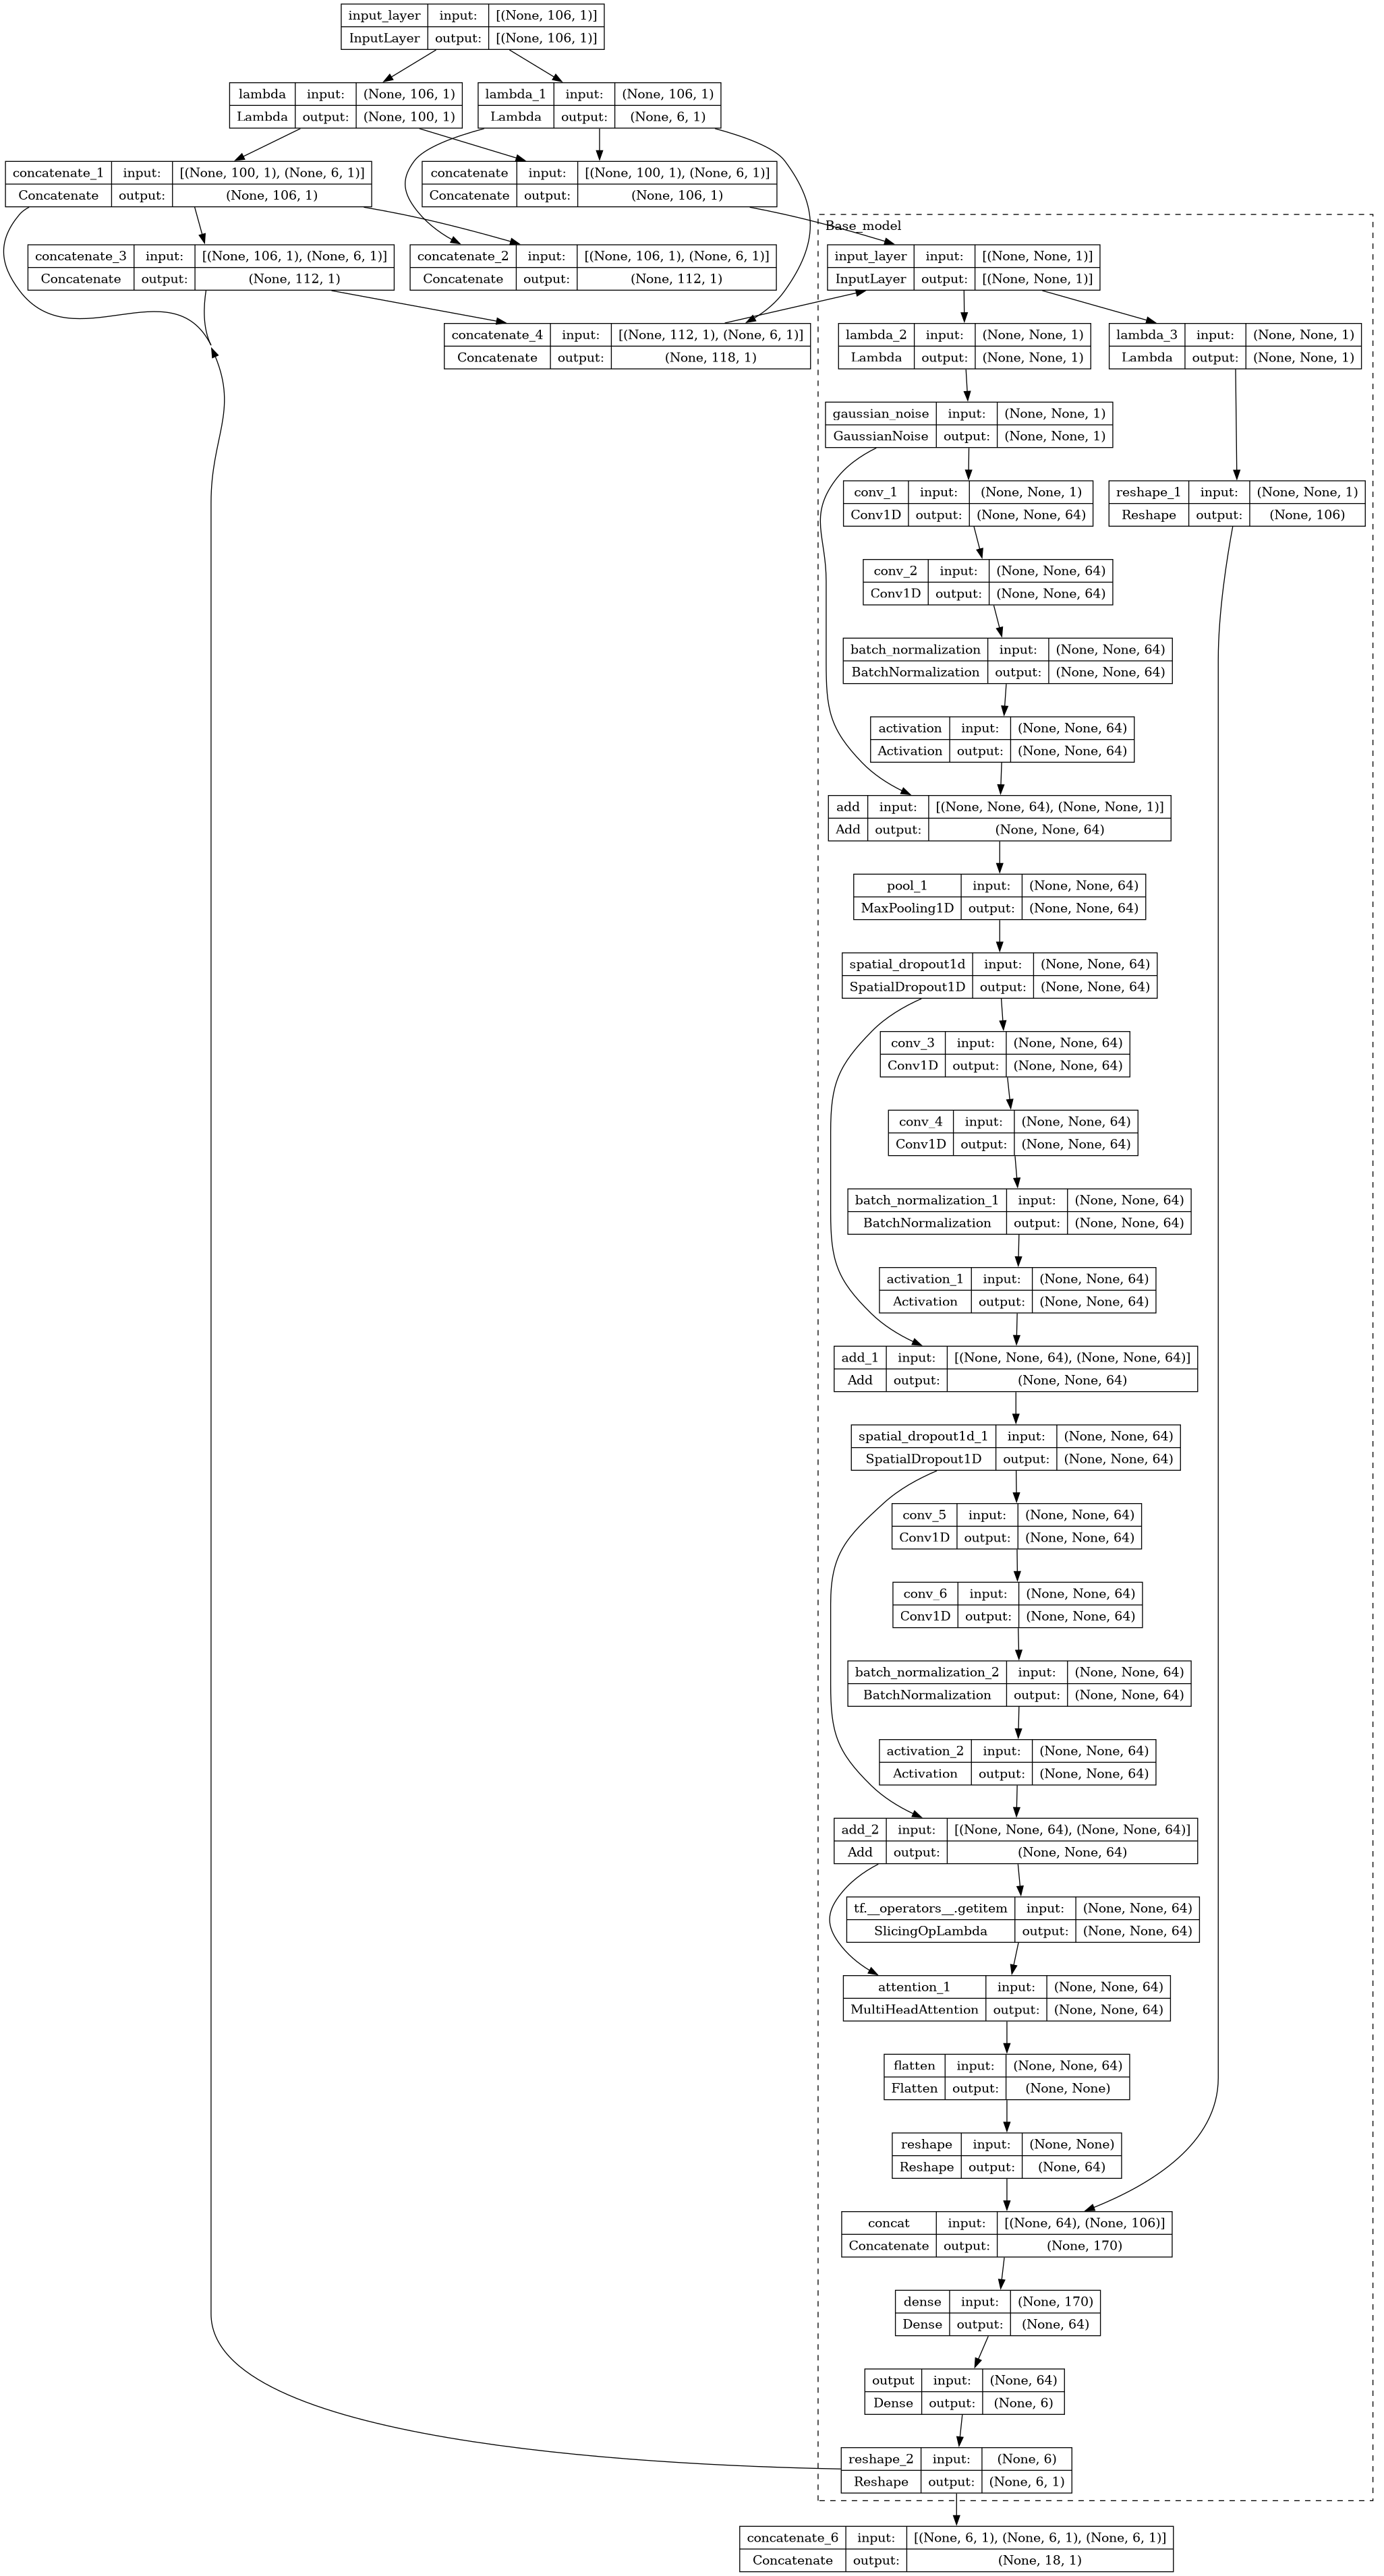

In [23]:
input_shape = (106, 1)
output_shape = (18, 1)

model, one_step_model = build_model(input_shape, output_shape)
one_step_model.summary()
model.summary()
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [ ]:
batch_size = 1024
epochs = 250

# Train the model
history = model.fit(
    x=train_windows,
    y=train_telescopes,
    validation_data=(val_windows, val_telescopes),
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tfk.callbacks.EarlyStopping(
            monitor="val_loss", mode="min", patience=30, restore_best_weights=True
        ),
        tfk.callbacks.ReduceLROnPlateau(
            monitor="val_loss", mode="min", patience=15, factor=0.5, min_lr=1e-5
        ),
    ],
).history

Epoch 1/250
 21/442 [>.............................] - ETA: 1:09 - loss: 0.0992 - mae: 0.2365

In [ ]:
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
model.save('/kaggle/working/Resnet50_multihead_attention_aug')